## Contents
1. Business Understanding
2. Exploratory Data Analysis
3. Data Visualization
4. Machine Learning

### Business Understanding
##### Context
dalam industri keuangan, deposit memiliki peran yang penting. Deposit adalah dana yang disimpan oleh nasabah di bank pada jangka waktu tertentu, tujuan utama program pemasaran adalah untuk meningkatkan jumlah deposit yang ada di perusahaan.


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/VIRTUAL INTERNSHIP/IDX PARTNER/dataset/loan_data_2007_2014.csv')
data

<ipython-input-5-828b1c9bfeb2>:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/VIRTUAL INTERNSHIP/IDX PARTNER/dataset/loan_data_2007_2014.csv')


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,...,NaN,NaN,NaN,NaN,NaN,NaN,29900.0,NaN,NaN,NaN
466281,466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,...,NaN,NaN,NaN,NaN,NaN,NaN,39400.0,NaN,NaN,NaN
466282,466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,...,NaN,NaN,NaN,NaN,NaN,NaN,13100.0,NaN,NaN,NaN
466283,466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,...,NaN,NaN,NaN,NaN,NaN,NaN,53100.0,NaN,NaN,NaN


In [ ]:
data.columns

Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url',
       'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verificatio

In [ ]:
df=data[['id','member_id', 'loan_amnt',
       'funded_amnt', 'funded_amnt_inv', 'term',
       'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length']]

## Data Preparetion
Berikut adalah tahapan data preprocessing yang dilakukan:

1. Cek data duplikat
2. Pemilihan variabel pemodelan
3. Cek dan penanganan missing value
4. Cek word spelling
Penambahan variabel untuk pemodelan
Pada tahap ini tidak dilakukan identifying outlier karena dirasa kurang penting terhadap pemodelan yang akan dilakukan. Identifikasi outlier begitu penting ketika diimplementasikan untuk analisis model parametrik atau uji parametrik yang membutuhkan asumsi data tanpa outlier ataupun normalitas data. Namun, pada classification (klasifikasi) tidak terdapat asumsi tersebut sehingga identifying outlier bisa diabaikan.

### Explore Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               466285 non-null  int64  
 1   member_id        466285 non-null  int64  
 2   loan_amnt        466285 non-null  int64  
 3   funded_amnt      466285 non-null  int64  
 4   funded_amnt_inv  466285 non-null  float64
 5   term             466285 non-null  object 
 6   int_rate         466285 non-null  float64
 7   installment      466285 non-null  float64
 8   grade            466285 non-null  object 
 9   sub_grade        466285 non-null  object 
 10  emp_title        438697 non-null  object 
 11  emp_length       445277 non-null  object 
dtypes: float64(3), int64(4), object(5)
memory usage: 42.7+ MB


### Cleaning Data

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.duplicated().any()

False

In [ ]:
df.isna().sum()

,0
id,0
member_id,0
loan_amnt,0
funded_amnt,0
funded_amnt_inv,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0


In [ ]:
df = df.dropna().reset_index(drop=True)

In [ ]:
df.isna().sum()

,0
id,0
member_id,0
loan_amnt,0
funded_amnt,0
funded_amnt_inv,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0


### Label Encoding

In [ ]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length
0,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year
1,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years
2,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year
3,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years
4,1069639,1304742,7000,7000,7000.0,60 months,15.96,170.08,C,C5,Southern Star Photography,8 years


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438511 entries, 0 to 438510
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               438511 non-null  int64  
 1   member_id        438511 non-null  int64  
 2   loan_amnt        438511 non-null  int64  
 3   funded_amnt      438511 non-null  int64  
 4   funded_amnt_inv  438511 non-null  float64
 5   term             438511 non-null  object 
 6   int_rate         438511 non-null  float64
 7   installment      438511 non-null  float64
 8   grade            438511 non-null  object 
 9   sub_grade        438511 non-null  object 
 10  emp_title        438511 non-null  object 
 11  emp_length       438511 non-null  object 
dtypes: float64(3), int64(4), object(5)
memory usage: 40.1+ MB


In [ ]:
df['term'].value_counts()

,count
term,
36 months,315220
60 months,123291


In [ ]:
df['term'].replace({' 36 months':36,' 60 months':60,},inplace=True)
df

<ipython-input-17-7adc459f8263>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['term'].replace({' 36 months':36,' 60 months':60,},inplace=True)
<ipython-input-17-7adc459f8263>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['term'].replace({' 36 months':36,' 60 months':60,},inplace=True)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length
0,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,< 1 year
1,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years
2,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,University Medical Group,1 year
3,1075269,1311441,5000,5000,5000.0,36,7.90,156.46,A,A4,Veolia Transportaton,3 years
4,1069639,1304742,7000,7000,7000.0,60,15.96,170.08,C,C5,Southern Star Photography,8 years
...,...,...,...,...,...,...,...,...,...,...,...,...
438506,9745484,11597572,15000,15000,15000.0,36,13.53,509.25,B,B5,Director of Operations,4 years
438507,8598660,1440975,18400,18400,18400.0,60,14.47,432.64,C,C2,Financial Advisor,4 years
438508,9684700,11536848,22000,22000,22000.0,60,19.97,582.50,D,D5,Chief of Interpretation (Park Ranger),10+ years
438509,9584776,11436914,20700,20700,20700.0,60,16.99,514.34,D,D1,patrol,7 years


In [ ]:
df['grade'].value_counts()

,count
grade,
B,128729
C,117875
D,72183
A,70424
E,33679
F,12480
G,3141


In [ ]:
df['grade'].replace({'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7},inplace=True)
df

<ipython-input-19-f1cf98c0dd28>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['grade'].replace({'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7},inplace=True)
<ipython-input-19-f1cf98c0dd28>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['grade'].replace({'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G'

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length
0,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,3,C4,Ryder,< 1 year
1,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,3,C1,AIR RESOURCES BOARD,10+ years
2,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,2,B5,University Medical Group,1 year
3,1075269,1311441,5000,5000,5000.0,36,7.90,156.46,1,A4,Veolia Transportaton,3 years
4,1069639,1304742,7000,7000,7000.0,60,15.96,170.08,3,C5,Southern Star Photography,8 years
...,...,...,...,...,...,...,...,...,...,...,...,...
438506,9745484,11597572,15000,15000,15000.0,36,13.53,509.25,2,B5,Director of Operations,4 years
438507,8598660,1440975,18400,18400,18400.0,60,14.47,432.64,3,C2,Financial Advisor,4 years
438508,9684700,11536848,22000,22000,22000.0,60,19.97,582.50,4,D5,Chief of Interpretation (Park Ranger),10+ years
438509,9584776,11436914,20700,20700,20700.0,60,16.99,514.34,4,D1,patrol,7 years


In [ ]:
dtype_mapper = {
    "term":"int64",
    "int_rate":"int64",
    "installment":"int64",
    "grade":"int64"
}

df = df.astype(dtype_mapper)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438511 entries, 0 to 438510
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               438511 non-null  int64  
 1   member_id        438511 non-null  int64  
 2   loan_amnt        438511 non-null  int64  
 3   funded_amnt      438511 non-null  int64  
 4   funded_amnt_inv  438511 non-null  float64
 5   term             438511 non-null  int64  
 6   int_rate         438511 non-null  int64  
 7   installment      438511 non-null  int64  
 8   grade            438511 non-null  int64  
 9   sub_grade        438511 non-null  object 
 10  emp_title        438511 non-null  object 
 11  emp_length       438511 non-null  object 
dtypes: float64(1), int64(8), object(3)
memory usage: 40.1+ MB


### EDA

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length'],
      dtype='object')

In [ ]:
df.emp_length.value_counts()

,count
emp_length,
10+ years,147367
2 years,40970
3 years,36041
< 1 year,35648
5 years,30253
1 year,29392
4 years,27571
7 years,25773
6 years,25736


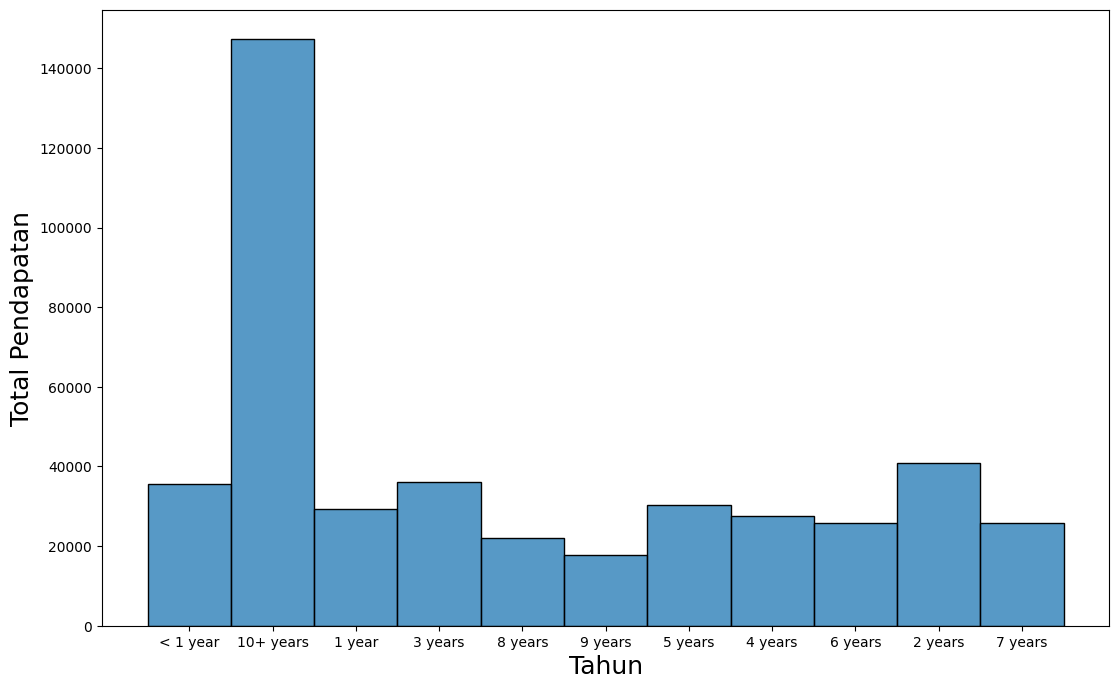

In [ ]:
# Create a bar chart
plt.figure(figsize=(13,8))
sns.histplot(df['emp_length'])
sns.set_theme(style="whitegrid")




plt.ylabel('Total Pendapatan', size=18)
plt.xlabel('Tahun', size=18)

plt.show()

1. pada tahun ke 10 lebih pendapatan naik cukup signifikan di banding dengan tahun - tahun yang lain.
2. pada tahun ke 9 menjadi pendapatan paling rendah di banding tahun - tahun yang lain.

In [ ]:
term_funded_amnt= df.groupby('installment').agg({"int_rate": "sum"})
term_funded_amnt

,int_rate
installment,
15,24
16,54
18,12
19,17
20,47
...,...
1404,25
1406,225
1407,175


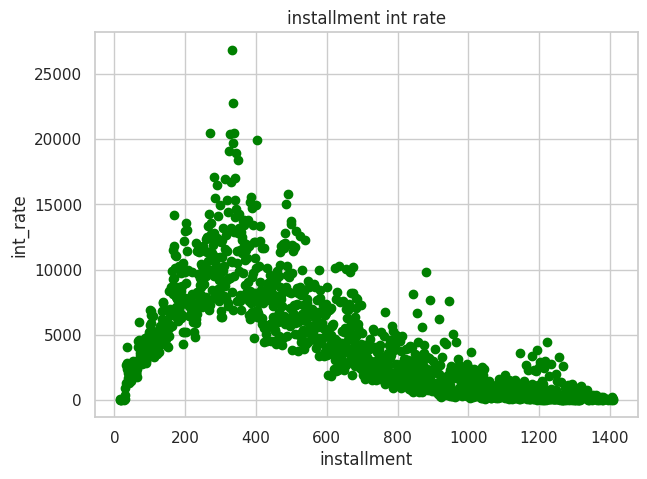

In [ ]:
# Create scater plot for shiping cost profit
fig, ax = plt.subplots(figsize=(7, 5))

ax.scatter(
    term_funded_amnt.index,
    term_funded_amnt["int_rate"],
    color='green',
)

ax.set_title('installment int rate')
ax.set_xlabel('installment')
ax.set_ylabel('int_rate')
# ax.set_xticklabels(region_sum_sales.index, rotation=90)
ax.grid(True)
# ax.yaxis.set_major_formatter(lambda x, pos: '$' + '{:,.2f}'.format(x/1000) + 'K')

# Show the line chart
fig.show()

# hubungan antara cicilan dan suku bunga

dalam visualisasi scater plot di atas di ketahui bahwa ada cilian salah satu cicilan yang sangat besar melebihi rata - rata.


### Korelasi

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438511 entries, 0 to 438510
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               438511 non-null  int64  
 1   member_id        438511 non-null  int64  
 2   loan_amnt        438511 non-null  int64  
 3   funded_amnt      438511 non-null  int64  
 4   funded_amnt_inv  438511 non-null  float64
 5   term             438511 non-null  int64  
 6   int_rate         438511 non-null  int64  
 7   installment      438511 non-null  int64  
 8   grade            438511 non-null  int64  
 9   sub_grade        438511 non-null  object 
 10  emp_title        438511 non-null  object 
 11  emp_length       438511 non-null  object 
dtypes: float64(1), int64(8), object(3)
memory usage: 40.1+ MB


In [ ]:
df_kor = df[['loan_amnt','funded_amnt','funded_amnt_inv','term','int_rate','installment','grade']]
df_kor

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade
0,2500,2500,2500.0,60,15,59,3
1,10000,10000,10000.0,36,13,339,3
2,3000,3000,3000.0,60,12,67,2
3,5000,5000,5000.0,36,7,156,1
4,7000,7000,7000.0,60,15,170,3
...,...,...,...,...,...,...,...
438506,15000,15000,15000.0,36,13,509,2
438507,18400,18400,18400.0,60,14,432,3
438508,22000,22000,22000.0,60,19,582,4
438509,20700,20700,20700.0,60,16,514,4


In [ ]:
df_kor.corr()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade
loan_amnt,1.000000,0.998551,0.994252,0.412640,0.169523,0.948864,0.167725
funded_amnt,0.998551,1.000000,0.996030,0.410683,0.170310,0.950971,0.167380
funded_amnt_inv,0.994252,0.996030,1.000000,0.411901,0.171615,0.946440,0.163924
term,0.412640,0.410683,0.411901,1.000000,0.446801,0.157146,0.457821
int_rate,0.169523,0.170310,0.171615,0.446801,1.000000,0.149869,0.948366
installment,0.948864,0.950971,0.946440,0.157146,0.149869,1.000000,0.139859
grade,0.167725,0.167380,0.163924,0.457821,0.948366,0.139859,1.000000


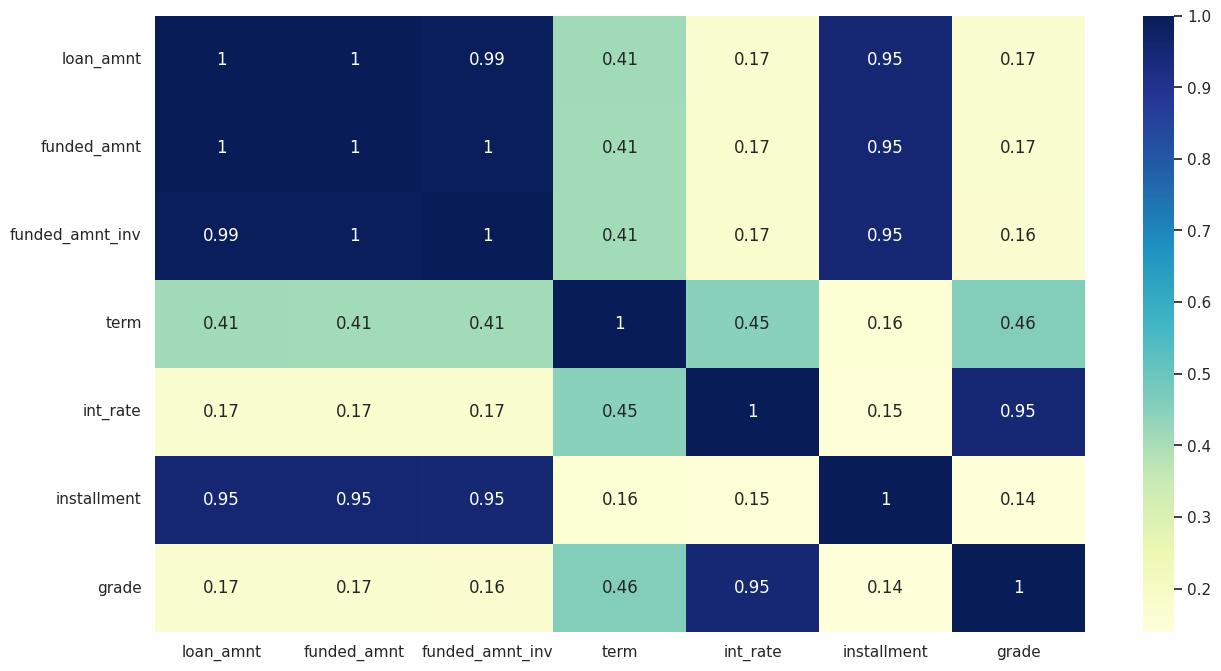

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(df_kor.corr(), cmap='YlGnBu', annot=True);

### Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X = df[['loan_amnt','funded_amnt','funded_amnt_inv','term','int_rate','installment']]

y = df['grade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Hyper Parameter Tunning

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report

In [ ]:
# input parameter grid search
parameterr_grid_search = [
    {'n_estimators': [100, 50], 'max_depth': [5, 7, 8, 10, 15, 17]}, # Changed {100,50} to [100,50]
    {'n_estimators': [25, 50, 75, 100], 'max_depth': [5, 7, 8, 10, 15, 17]} # Changed {25,50,75,100} to [25,50,75,100]
]

In [ ]:
# metric performa
metrics = ['accuracy',  'f1_weighted']

In [ ]:
# for metric in metrics:
#   print('### Sedang mencari parameter optimal untuk metric pengukuran', metric)
#   classifier = GridSearchCV(ExtraTreesClassifier(random_state=0), parameterr_grid_search, cv=5, scoring=metric)
#   classifier.fit(X_train, y_train)

#   print('Best parameters:', classifier.best_params_)

#   y_pred = classifier.predict(X_test)
#   print('hasil classification repor\n')
#   print(classification_report(y_test, y_pred))

### Sedang mencari parameter optimal untuk metric pengukuran accuracy


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters: {'max_depth': 17, 'n_estimators': 75}
hasil classification repor

              precision    recall  f1-score   support

           1       0.98      0.99      0.98     14125
           2       0.91      0.87      0.89     25719
           3       0.77      0.81      0.79     23547
           4       0.73      0.79      0.76     14399
           5       0.83      0.70      0.76      6757
           6       0.87      0.82      0.84      2517
           7       0.86      0.67      0.76       639

    accuracy                           0.84     87703
   macro avg       0.85      0.81      0.83     87703
weighted avg       0.85      0.84      0.84     87703

### Sedang mencari parameter optimal untuk metric pengukuran f1_weighted
Best parameters: {'max_depth': 17, 'n_estimators': 75}
hasil classification repor

              precision    recall  f1-score   support

           1       0.98      0.99      0.98     14125
           2       0.91      0.87      0.89     25719
 

### Hyper Parameter Tunning

In [ ]:
# Decision Tree Classifier (GridSearchCV)
# from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
dtree = LogisticRegression()
param_grid = {
    # 'penalty':['l2'],
    # 'dual':[False],  # Wrap 'False' in a liast
    # 'tol':[0.0001],
    'C':[2.0],
    # 'fit_intercept':[True],
    # 'intercept_scaling':[1],
    # 'class_weight':[None],
    # 'random_state':[None],
    'max_iter':[800],
    # 'multi_class':['auto'],  # Change 'deprecated' to a valid option like 'auto'
    # 'verbose':[0],
    # 'warm_start':[False],
    # 'n_jobs':[None],
    # 'l1_ratio':[None],
    'solver':['lbfgs']

}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(dtree, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

{'C': 2.0, 'max_iter': 800, 'solver': 'lbfgs'}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0, max_depth=4, min_samples_leaf=3, min_samples_split=2, class_weight='balanced')
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=4, min_samples_leaf=3,
                       random_state=0)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = dtree.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 81.99 %


## Machine Learning Modelling

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
model1 = LogisticRegression()
model2 = DecisionTreeClassifier()
model3 = KNeighborsClassifier()

In [ ]:
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


KNeighborsClassifier()

In [ ]:
print('Akurasi:')

print('Model1 LogisticRegression: ', model1.score(X_test, y_test))
print('Model2 DecisionTreeClassifier: ', model2.score(X_test, y_test))
print('Model3 KNeighborsClassifier: ', model3.score(X_test, y_test))

Akurasi:
Model1 LogisticRegression:  0.3453473655405174
Model2 DecisionTreeClassifier:  0.8861954551155605
Model3 KNeighborsClassifier:  0.8429358174748869


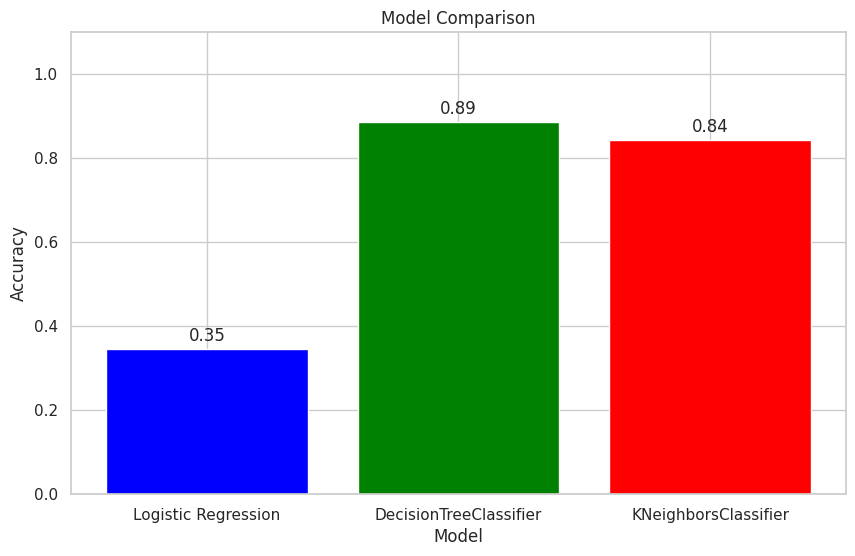

In [ ]:
logistic_regression_score = model1.score(X_test, y_test)
LinearDiscriminantAnalysis_score = model2.score(X_test, y_test)
GaussianNB_score = model3.score(X_test, y_test)


# Model names and their corresponding scores
# Include 'XGboost' in the models list to match the length of scores
models = ['Logistic Regression', 'DecisionTreeClassifier', 'KNeighborsClassifier']
scores = [logistic_regression_score, LinearDiscriminantAnalysis_score, GaussianNB_score,]

# Creating the bar chart
plt.figure(figsize=(10, 6))
# Add a fourth color for the XGboost bar
bars = plt.bar(models, scores, color=['blue', 'green', 'red', 'purple'])

# Adding text labels for the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

# Adding titles and labels
plt.title('Model Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1.1)

# Display the plot
plt.show()

<Axes: >

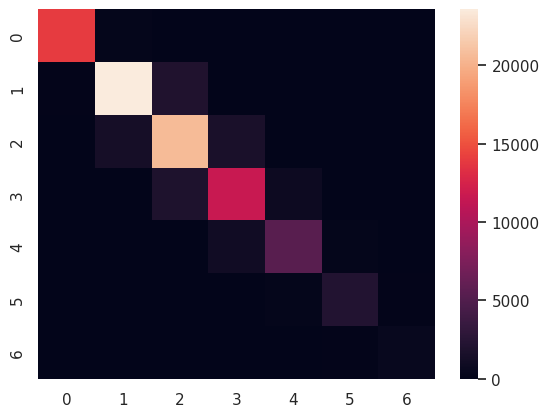

In [ ]:
from sklearn.metrics import confusion_matrix # Import confusion_matrix from sklearn.metrics
y_pred = model2.predict(X_test)
hasil_prediksi = confusion_matrix(y_test, y_pred)
sns.heatmap(hasil_prediksi)